<a href="https://colab.research.google.com/github/NewburghCat/dalmatians_sales/blob/main/Project_2_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dalmatians Sales Project 

*   The Dalmatian sales project anaylses shipping data from a E-commerce customer database. The name 'Dalmatian' was selected because of the correlations of many spots. Shipping data can be similar with the data acting as spots connected to one living organism - the customer.(playing the role of an identifier)

Data Set: E-Commerce Data


*   An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.








**Interest**

1. Key Insights 
2. Customer Insight 
3. Best practices 
4. Do we need to improve or change?


Library Imports 

In [99]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn. preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping


In [100]:
from google.colab import drive 
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# load data

filename = '/content/drive/MyDrive/Colab Notebooks/Project 2/Train_E-CommerceShippingData.csv'
df = pd.read_csv(filename)
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [102]:
# Identify data shape

df.shape

(10999, 12)

In [103]:
# Identify data types 

df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

# Data Cleaning

In [104]:
# Identify duplicates 

df.duplicated().sum()

0

In [105]:
# Identify missing data 

df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [106]:
# create a dtype filter to be used to count their values 

dtypes = df.dtypes
header_columns = dtypes[dtypes=='object'].index
header_columns

for all in header_columns:
  print(f'- column= {all}')
  print(df[all].value_counts(dropna=False))
  print('\n\n')

- column= Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



- column= Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64



- column= Product_importance
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64



- column= Gender
F    5545
M    5454
Name: Gender, dtype: int64





In [107]:
# drop unnecessary columns

df= df.drop(columns=['ID'])

In [108]:
# drop nan found in rows 

df = df.dropna()

In [109]:
# Convert string columns to a numeric value. This ensures accuracy in data evalutaion. 

# create filters to replace string 
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].replace({'Ship': 0, 'Flight': 1, 'Road': 2})
df['Product_importance'] = df['Product_importance'].replace({'low':0, 'medium': 1, 'high':2})


In [110]:
df.describe().round(2)

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,0.48,4.05,2.99,210.20,3.57,0.60,13.37,3634.02,0.60
std,0.75,1.14,1.41,48.06,1.52,0.64,16.21,1635.38,0.49
min,0.00,2.00,1.00,96.00,2.00,0.00,1.00,1001.00,0.00
25%,0.00,3.00,2.00,169.00,3.00,0.00,4.00,1839.50,0.00
50%,0.00,4.00,3.00,214.00,3.00,1.00,7.00,4149.00,1.00
75%,1.00,5.00,4.00,251.00,4.00,1.00,10.00,5050.00,1.00
max,2.00,7.00,5.00,310.00,10.00,2.00,65.00,7846.00,1.00


Findings:

The df.describe function returned outliers in columns: Mode of Shipment, Prior_purchases, Product_importance and Discount_offered. 

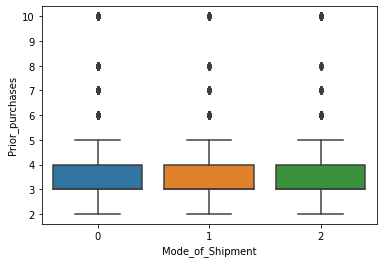

In [111]:
# create boxplot for the outliers 

sns.boxplot(x='Mode_of_Shipment', y='Prior_purchases', data=df)

Findings:

There are approximately four straggling outliers in both Mode_of_Shipmet and Prior_purchases.

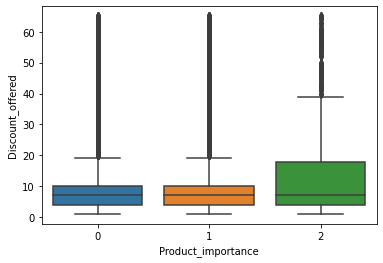

In [112]:
# create boxplot for the outliers 

sns.boxplot(x='Product_importance', y='Discount_offered', data=df)

Findings:

Product_ importance seems to have more outliers than Discount_offered.

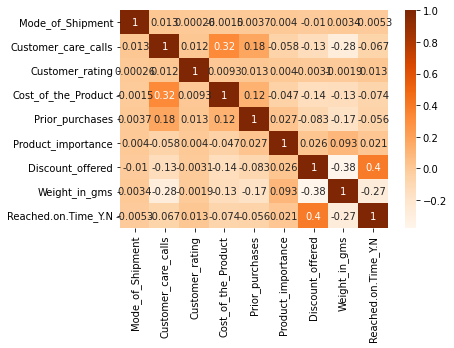

In [113]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges', annot= True)

Preprocessing 

In [114]:
#  Featured Matrix and Target Vector
y = df['Reached.on.Time_Y.N']
X = df.drop(columns = 'Reached.on.Time_Y.N')

# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [115]:
#make categorical selector
cat_selector = make_column_selector(dtype_include='object')


In [116]:
cat_selector(X_train)

['Warehouse_block', 'Gender']

In [117]:
# create a subset of data for only categorical columns
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

,Warehouse_block,Gender
1463,F,F
10751,F,F
3785,F,F
3397,F,F
5737,F,F
...,...,...
5734,C,F
5191,F,F
5390,A,F
860,A,F


In [118]:
#instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#fit the OneHotEncoder on the training data
ohe_encoder.fit(train_cat_data)

#transform both the training and the testing data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe


array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [119]:
#convert to dataframe, extract new column names from encoder
#set prefixes to original column names
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
8244,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8245,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8246,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8247,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [120]:
# create a numeric selector
num_selector = make_column_selector(dtype_include='number')

# isolate the numeric columns
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)

# re-combine the train and test sets on axis 1 (columns)
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed


,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
0,0,4,3,170,2,1,33,1980,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,5,5,244,6,0,1,1222,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,5,5,184,3,0,5,5045,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,4,4,176,3,0,1,4774,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2,5,1,248,2,0,6,5281,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,2,3,5,275,2,0,7,4619,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8245,2,5,5,187,4,1,9,5326,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8246,0,4,2,137,2,1,2,5804,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8247,0,5,3,144,6,1,35,1009,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Random Forest Regressor 

In [121]:
rf = RandomForestRegressor(random_state = 42)

In [122]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [123]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [124]:
# Predict the values for y
rf.predict(X_test_processed)

array([1.  , 0.46, 0.63, ..., 0.41, 1.  , 0.56])

In [125]:
# Evaluate your model performance

rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)


0.8898915544259076
0.22515848484848489


Tune your model

In [126]:
# Turning the max_depth

rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train_processed, y_train)
rf_9_train_score = rf_9.score(X_train_processed, y_train)
rf_9_test_score = rf_9.score(X_test_processed, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.3690286277964515
0.2607025987538064


In [127]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)


46

In [128]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])

for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train_processed, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train_processed, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test_processed, y_test)
   scores.head()

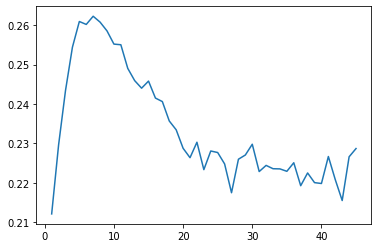

In [129]:
# plot the change in scores to see the best maximum depth

plt.plot(scores['Test Score'])


The best test score comes in around 9. 

In [130]:
# sort the scores dataframe by the test score to see which depth was best.

sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()


,Test Score,Train Score
7,0.262255,0.307556
5,0.260918,0.272412
8,0.26076,0.336212
6,0.260179,0.287085
9,0.258534,0.371657


In [131]:
# try to improve our score by tuning the number of estimators

# choose a couple of values for n_estimators to save time
# you can use another loop later to narrow down the best number
# by trying numbers close to the best one

n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train_processed, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train_processed, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test_processed, y_test)
scores2.head()


,Test Score,Train Score
50,0.220186,0.882543
100,0.225465,0.888028
150,0.223833,0.888091
200,0.229569,0.890335
250,0.225454,0.889818


Findings:

The improved test score does not differ far off from the original test score. 


*   Original best test score - 0.26
*   Improved test score - 0.23



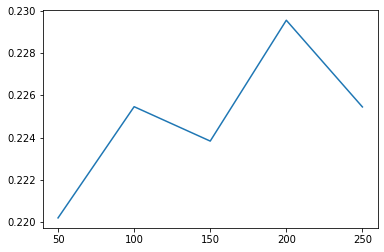

In [132]:
# plot the results

plt.plot(scores2['Test Score'])
plt.xticks(n_ests);


Findings:

The test score peaks at 190.

In [133]:
# sort the results to see the best score

sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()


,Test Score,Train Score
200,0.229569,0.890335
100,0.225465,0.888028
250,0.225454,0.889818
150,0.223833,0.888091
50,0.220186,0.882543


Findings 

Random forests are powerful, but slow training ensemble models. 

In [134]:
#Custom function to plot predictions and evaluate a model
def plot_r2(X, y, y_pred):

  #plot true labels
  plt.scatter(X, y, label='True Values')

  #plot predicted labels
  plt.scatter(X, y_pred, label='Predicted Values')
  plt.legend()
  plt.xlabel('X')
  plt.ylabel('y')
  plt.show()
  
  #print R2 score
  print('\nR2 Score', r2_score(y, y_pred))

In [135]:
#create data

df = make_regression(n_features=1, # 1 feature
                     n_informative=1, # 1 feature the correlates to target
                     n_targets=1, # 1 target
                     n_samples=1000, # 1000 Samples
                     random_state=42) # random state for reproducibility

Text(0, 0.5, 'y')

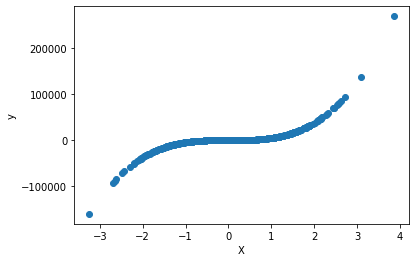

In [136]:
X = df[0]
y = df[1]

#Let's make this interesting and make y a sine wave by cubing it
y = y**3

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

In [137]:
# validation split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

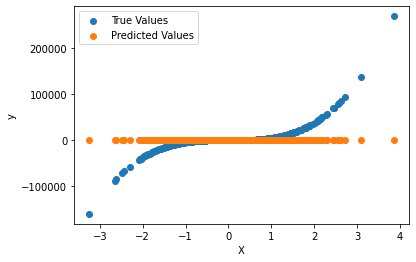


R2 Score 0.0


In [138]:
#Create baseline regressor and use the mean

baseline = DummyRegressor(strategy='mean')

baseline.fit(X_train, y_train)
y_pred_1 = baseline.predict(X_train)
plot_r2(X_train, y_train, y_pred_1)

In [139]:
#create pseudo-residuals

resid_1 = y_train - y_pred_1

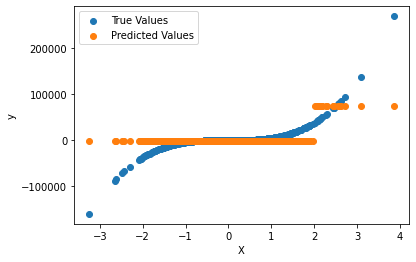


R2 Score 0.3853730211307187


In [140]:
#Fit a depth 1 decision tree to use X_t to predict resid_1

tree_1 = DecisionTreeRegressor(max_depth=1)

tree_1.fit(X_train, resid_1)

y_pred_2 = tree_1.predict(X_train)

#add the predictions together
pred = y_pred_1 + y_pred_2

plot_r2(X_train, y_train, pred)


In [141]:
#second residuals

resid_2 = resid_1 - y_pred_2
resid_2[:5]

array([3192.17867921, 5223.11364167,  680.49506866, 5804.86251365,
        901.45303729])

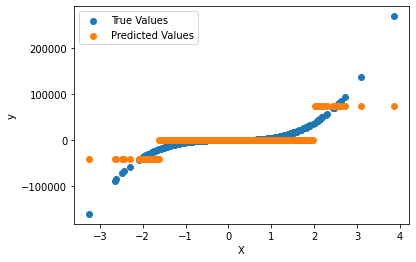


R2 Score 0.5839918105519601


In [142]:
#Fit a depth 1 decision tree to use X_t to predict resid_2

tree_2 = DecisionTreeRegressor(max_depth=1)

tree_2.fit(X_train, resid_2)

y_pred_3 = tree_2.predict(X_train)

#3rd residuals
resid_3 = resid_2 - y_pred_3

#add the predictions together
pred = y_pred_1 + y_pred_2 + y_pred_3

plot_r2(X_train, y_train, pred)

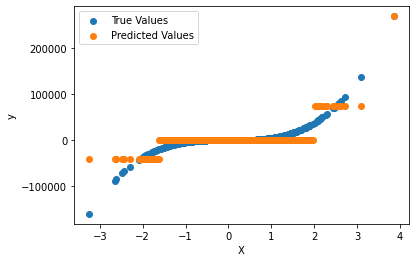


R2 Score 0.7190134633329139


In [143]:
# One more time:

#Fit a depth 1 decision tree to use X_t to predict resid_3
tree_3 = DecisionTreeRegressor(max_depth=1)

tree_3.fit(X_train, resid_3)

y_pred_4 = tree_3.predict(X_train)

#4th residuals
resid_4 = resid_3 - y_pred_4

#add the predictions together
pred = y_pred_1 + y_pred_2 + y_pred_3 + y_pred_4

plot_r2(X_train, y_train, pred)

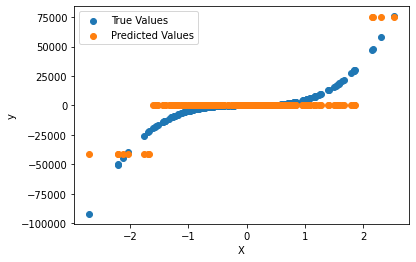


R2 Score 0.6072816856330459


In [144]:
# Let's try our model on the test set.
# We will add up the predictions of each of our weak learners
weak_learners = [baseline, tree_1, tree_2, tree_3]
preds = []
for learner in weak_learners:
  preds.append(learner.predict(X_test))

final_pred = sum(preds)

plot_r2(X_test, y_test, final_pred)

Findings:

The R2 score of the model trained here varies from 0.58 to 0.71 which is not bad. If the value of the r squared score is 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset.

This also implies that the closer the value of the r squared score is to 1, the more perfectly the model is trained.

XGBRegressor predicts the best score at 0.99

[13:12:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


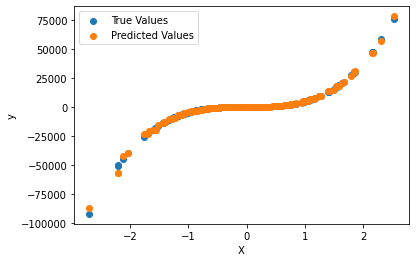


R2 Score 0.9963669284526002


In [145]:
xgb = XGBRegressor(n_estimators=300, max_depth=1)

xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

plot_r2(X_test, y_test, preds)

Linear Regression

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [147]:
scaler = StandardScaler()

In [148]:
#Import the model and instantiate the model
reg = LinearRegression()

#create a modeling pipeline
reg_pipe = make_pipeline(scaler, reg)

#Train the model on your training data 
reg_pipe.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [149]:
#Make predictions using the testing data 
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

Evaluate the Model Using Regression Metrics

In [150]:
#Calcualting MAE

train_MAE = np.mean(np.abs(train_pred - y_train))
test_MAE = np.mean(np.abs(test_pred - y_test))

print(f'Model Training MAE: {train_MAE}')
print(f'Model Testing MAE: {test_MAE}')

Model Training MAE: 7228.477251523344
Model Testing MAE: 6807.3345086645295


In [151]:
#Calculating RMSE 

train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 12735.260368256264
Model Testing RMSE: 8460.78240872003


In [152]:
#Calculating R2

train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.5622184777991398
Model Testing R2: 0.6414939358288525


This score can be interpreted as saying that our model can account for about 64% of the variation in y_test using the features in X_test.  

Neural Networks in Keras

In [153]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [154]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape


1

In [169]:
# Sequential model
model = Sequential()


In [170]:
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?



In [171]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))


In [172]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')


Fit Model

In [173]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)



Epoch 1/10
24/24 [==============================] - 1s 12ms/step - loss: 914.7421 - val_loss: -476.4225
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: -1266.2201 - val_loss: -2016.5863
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: -3360.6426 - val_loss: -3490.8396
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: -5564.8057 - val_loss: -5125.4458
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: -7924.9404 - val_loss: -7122.6982
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: -10809.1006 - val_loss: -9536.5176
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: -14448.6201 - val_loss: -12401.1162
Epoch 8/10
24/24 [==============================] - 0s 5ms/step - loss: -18677.6875 - val_loss: -16117.6641
Epoch 9/10
24/24 [==============================] - 0s 5ms/step - loss: -24164.5176 - val_loss: -20562.1113
Epoch 10/10
24/24 [======================

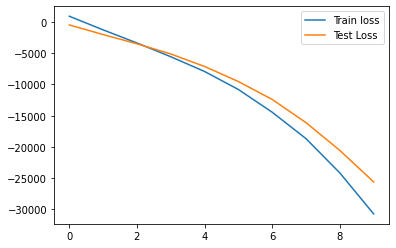

In [174]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();



In [175]:
# With early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])


Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: -2945.3706 - val_loss: -2879.2007
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: -5009.8940 - val_loss: -4340.9849
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: -7391.0659 - val_loss: -5945.6509
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: -10272.6152 - val_loss: -8780.5518
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: -15232.2490 - val_loss: -12206.8535
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: -20643.6230 - val_loss: -16514.9355
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: -27160.8828 - val_loss: -21482.7500
Epoch 8/100
24/24 [==============================] - 0s 7ms/step - loss: -34971.3164 - val_loss: -27144.7617
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: -43922.1992 - val_loss: -33938.1602
Epoch 10/100
24/24 [=====

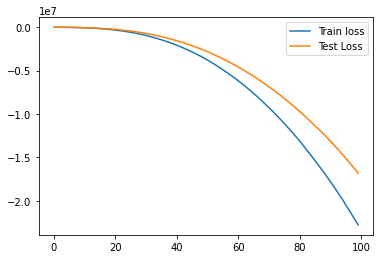

In [176]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();
